### A regular expression is simply a sequence of characters that define a pattern.

http://regexlib.com/CheatSheet.aspx

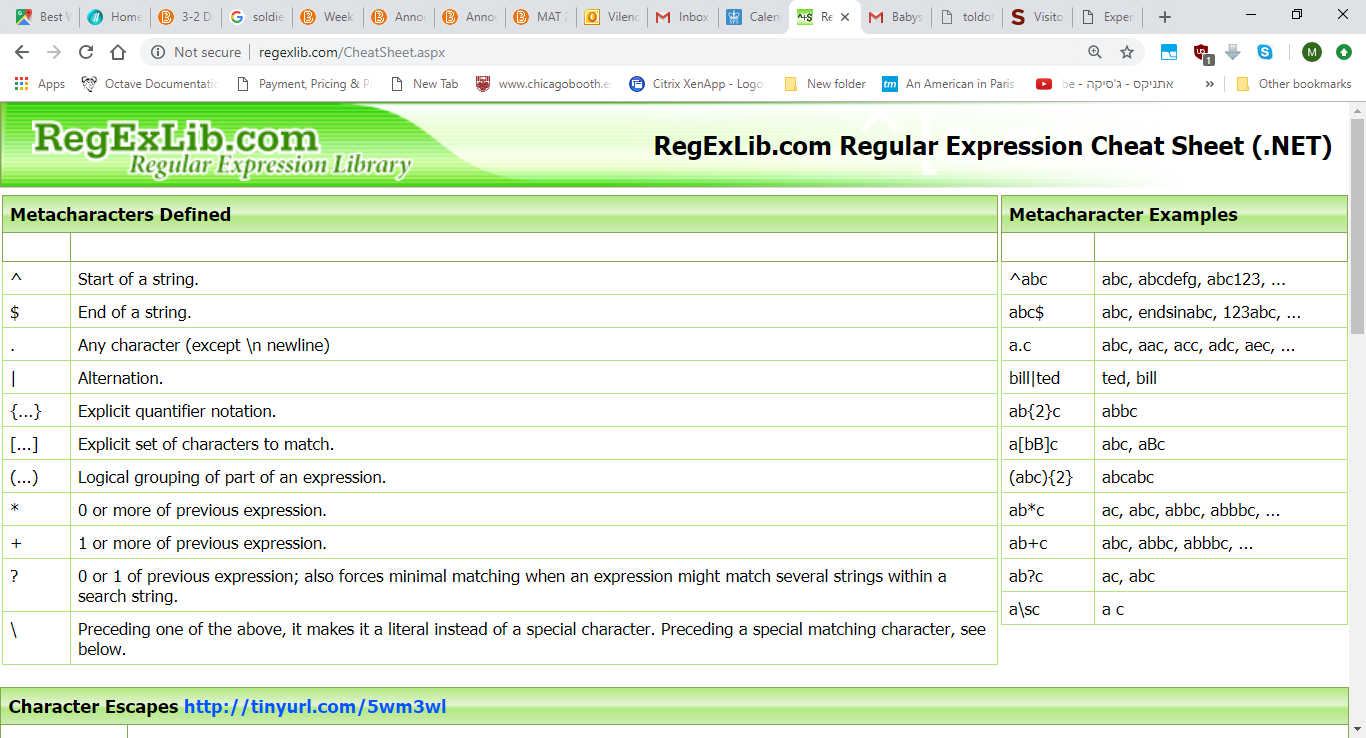

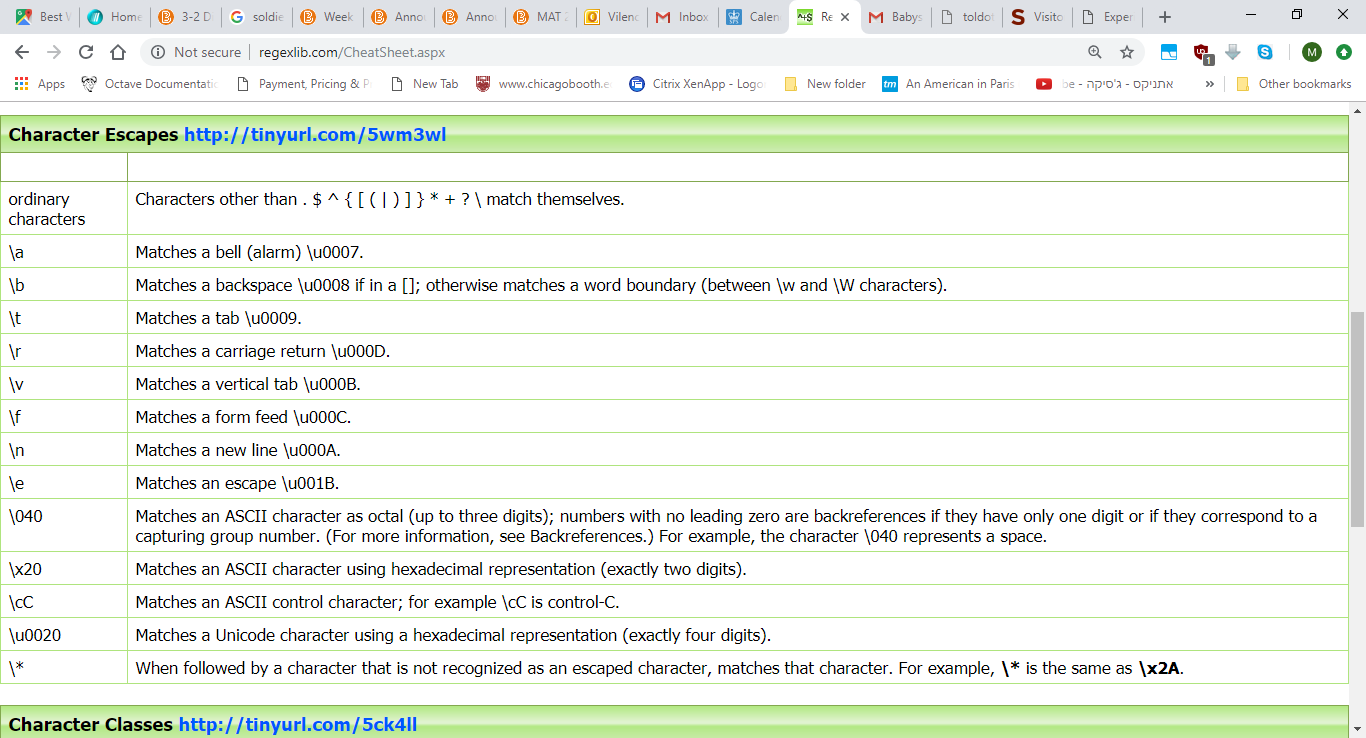

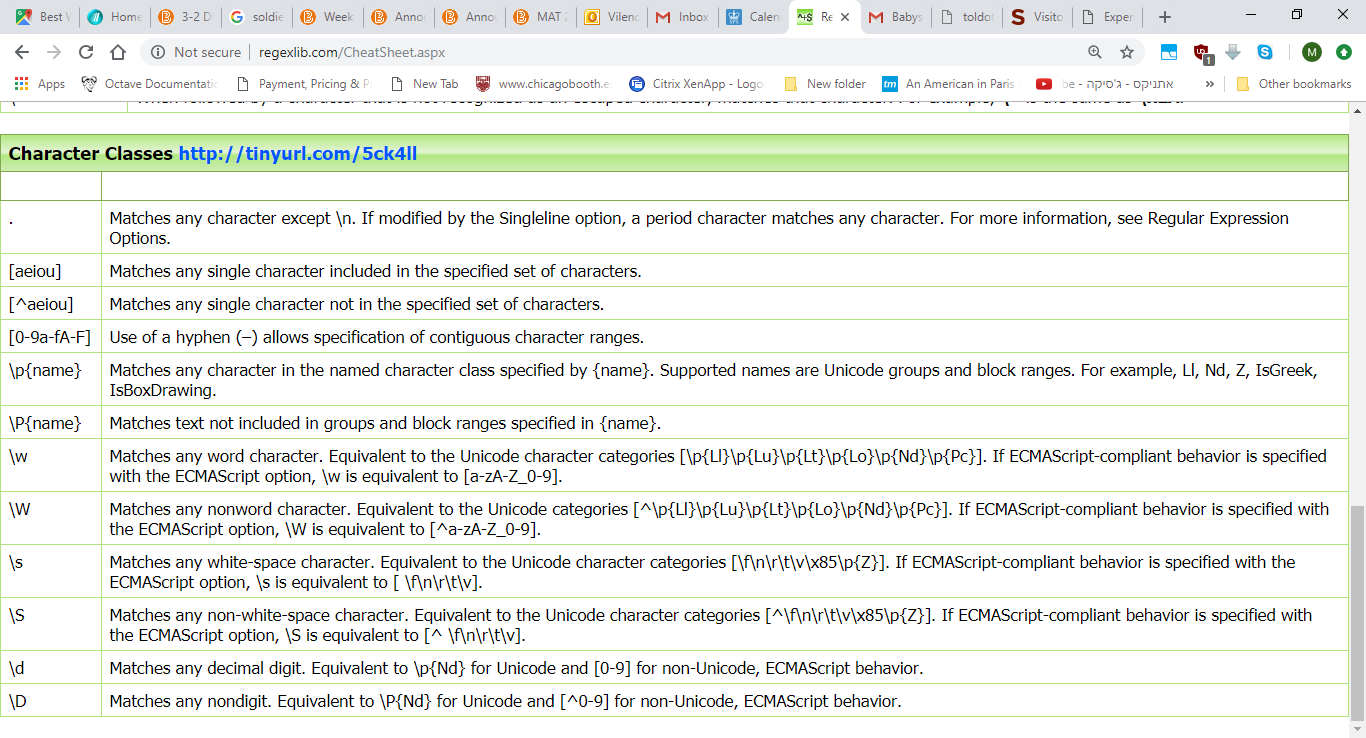

http://www.cbs.dtu.dk/courses/27610/regular-expressions-cheat-sheet-v2.pdf

#### Examples ####

In [1]:
import re
word = '\w+'
#the above defines a basic pattern of a normal string.  This pattern accounts for strings that contain
#letters and numbers but not spaces or punctuation. Also, the + sign makes it greedy, i.e. it will
#match until it does not match.
sentence = 'Here is my sentence.'


***Note: the re module functions fall into three categories: pattern matching, substitution, and
splitting***

*Pattern Matching with Regular Expressions*

In [2]:
re.findall(word, sentence)
#findall method locate all pattern matches in a string and returns a list of its elements. Note that
#here every word is found, but the period and white space are missing.

['Here', 'is', 'my', 'sentence']

In [3]:
#now, let us remove the + from the word above, i.e. let us make it non-greedy. Then, let's see what
#happens
word = '\w'
sentence = 'Here is my sentence.'

In [4]:
re.findall(word, sentence)
#note here that the pattern stops at each letter and does not keep going.

['H',
 'e',
 'r',
 'e',
 'i',
 's',
 'm',
 'y',
 's',
 'e',
 'n',
 't',
 'e',
 'n',
 'c',
 'e']

In [4]:
#let us count the number of numbers found in the following sentence: 
sentence="I have two dogs, 33 cats, 567 fish, and 9 lizards."


In [5]:
#Method 1
pattern='\d+'
re.findall(pattern, sentence)

['33', '567', '9']

In [7]:
print("The number of numerics found in the above sentence is: ", len(re.findall(pattern, sentence)))

The number of numerics found in the above sentence is:  3


In [6]:
#Method 2
pattern='[0-9]+'
re.findall(pattern, sentence)
#Both methods above are identical, as long as we include the +!

['33', '567', '9']

In [7]:
#Incorrect Method:
sentence="I have two dogs, 33 cats, 567 fish, and 9 lizards."
pattern='[0-9]'
re.findall(pattern, sentence)
#Notice that without the + sign, we get only the individual digits. We need the + sign to 
#continue searching for the pattern in a "greedy" fashion until we can no longer match.

['3', '3', '5', '6', '7', '9']

In [8]:
phrase="I was really unsatisfied with customer service. Bad customer service is an exaggeration!"
#How can I check whether the customer was satisfied with the service based on the above phrase/
#feedback?  For this, I can use the re.search method to see whether the word 'satisfied' is present
#anywhere in the phrase.  Of course I need to be careful NOT to confuse with the word 'unsatisfied'.
pattern='\s+satisf'
result=re.search(pattern, phrase).group()
#note above I made sure to include a greedy whitespace before satisf word to make sure it is not
#confused with the word 'unsatisfied'.  Search just searches for the first occurrence of the specified
#pattern.  If it finds a pattern, it returns a match object, otherwise it returns NoneType.  If
#it finds a match, we can use the group() method of the match object to extract the first 
#occurrence; otherwise, group() causes an error, like below.

AttributeError: 'NoneType' object has no attribute 'group'

In [9]:
try: 
    pattern='\s+satisf'
    result=re.search(pattern, phrase).group()
except AttributeError: 
    print("No evidence of customer satisfaction was found!")
    

No evidence of customer satisfaction was found!


In [10]:
phrase="I was really unsatisfied with customer service. Bad customer service is an exaggeration!"
pattern='(UN|not|dis)satisf|bad'
try: 
    result=re.search(pattern, phrase,flags=re.IGNORECASE).group()
    print("pattern found is: ",result)
    print("Customer was not satisfied")
except AttributeError: 
    print("No evidence of customer dissatisfaction was found!")

pattern found is:  unsatisf
Customer was not satisfied


In [16]:
phrase="I was really unsatisfied with customer service. Bad customer service is an exaggeration!"
pattern='(not)satisf|bad'
try: 
    result=re.search(pattern, phrase,flags=re.IGNORECASE).group()
    print("pattern found is: ",result)
    print("Customer was not satisfied")
except AttributeError: 
    print("No evidence of customer dissatisfaction was found!")

pattern found is:  Bad
Customer was not satisfied


In [11]:
word = '\w+'
sentence = 'Here is my sentence.'

In [12]:
search_result=re.search(word, sentence)
type(search_result)

re.Match

In [13]:
search_result.group()
#match object's group method returns the matched string as soon as one is found from the beginning
#of the text.

'Here'

In [14]:
number = '\d+'
sentence = 'I have 2 pets: Bear and Bunny'
search_number=re.search(number, sentence)
print(type(search_number))
search_number.group()

<class 're.Match'>


'2'

In [15]:
number = '\d+'
sentence = 'I have two pets: Bear and Bunny'
search_number=re.search(number, sentence)
type(search_number)
#if no pattern is found, then none is returned for the object.

NoneType

In [16]:
#If we want to match from the beginning of the sentence, then we use match:
word = '\w+'
sentence = 'Here is my sentence.'
re.match(word, sentence)

<re.Match object; span=(0, 4), match='Here'>

In [17]:
word = '\w+'
sentence = 'Here is my sentence.'
re.match(word, sentence).group()

'Here'

In [18]:
number = '\d+'
sentence = 'I have 2 pets: Bear and Bunny'
match_result=re.match(number, sentence)
print(type(match_result))
#None is returned, since there is no number at the beginning of the sentence

<class 'NoneType'>


In [19]:
match_result=re.match(word, sentence)
print(type(match_result))
print(match_result.group())
#the match method will only match if the pattern occurs at the start of the string; otherwise, will
#return None

<class 're.Match'>
I


In [20]:
sentence = 'I have 2 pets: Bear and Bunny'
capitalized_word='[A-Z]\w+'
match_capital=re.search(capitalized_word, sentence)
match_capital.group()
#returns the first occurrence of the pattern: the first capital word followed by non whitespace

'Bear'

In [30]:
sentence = 'I have 2 pets: Bear and Bunny'
#we can also achieve the exact same result as above: 
capitalized_word='[A-Z]\S+'
match_capital=re.search(capitalized_word, sentence)
match_capital.group()

'Bear'

In [31]:
sentence = 'I have 2 pets: Bear and Bunny'
capitalized_word='[A-Z]\w+'
match_capital=re.match(capitalized_word, sentence)
type(match_capital)
#since no pattern found at the beginning of the sentence, noneType is returned, so the below would
#cause an error.
#match_capital.group()

NoneType

In [21]:
sentence = 'I have 2 pets: Bear and Bunny'
#how can I extract a list of all my pet names from the above?
pattern='[A-Z]\S+'
re.findall(pattern, sentence)

['Bear', 'Bunny']

In [34]:
sentence = 'I have 2 pets: Bear and Bunny'
#how can I extract all capital words from the above sentence?
pattern='[A-Z][a-z]*'
#any capital letter followed by any small letter 0 or more times
re.findall(pattern, sentence)

['I', 'Bear', 'Bunny']

In [35]:
sentence = 'I have 2 pets: Bear and Bunny'
#how can I extract just the "I" from this sentence?
pattern='([A-Z])\s'
#any capital letter where we end right before empty space.  Note that the entire pattern is matched
# but only the subset inside the () is returned.
re.findall(pattern, sentence)

['I']

In [36]:
#Note what happens if I do not put parantheses above: 
sentence = 'I have 2 pets: Bear and Bunny'
pattern='[A-Z]\s'
#The white space is then also included in the pattern.
re.findall(pattern, sentence)

['I ']

In [37]:
sentence = 'I have the following pets: Bear,Bunny,Cat, Dog'
#how can I extract all types of pets from the above sentence?
pattern='[A-Z][a-z]+'
#any capital letter followed by any small letter 1 or more times
re.findall(pattern, sentence)

['Bear', 'Bunny', 'Cat', 'Dog']

In [38]:
#Question: how would you get the above using regular string methods?
sentence.split(":")[1].replace(" ","").split(",")

['Bear', 'Bunny', 'Cat', 'Dog']

In [39]:
sentence = 'I have the following pets: Bear,Bunny,Cat, Dog'
#how can I extract everything after the :?
pattern=':(.*)'
#any character that begins after the colon
re.findall(pattern, sentence)

[' Bear,Bunny,Cat, Dog']

In [40]:
#Matching multiple groups
import re
names_regex='([A-Z]\w+) ([A-Z]\w+)'
names = "Max Vilenchik, John Smith, Li Yang"
names_match=re.match(names_regex, names)
type(names_match)

re.Match

In [41]:
names_match.group()
#returns the first-found string matching the pattern from the beginning

'Max Vilenchik'

In [42]:
names_match.groups()
#based on how we defined the groups using parantheses, each group's element is included as
#a string inside a tuple

('Max', 'Vilenchik')

In [43]:
re.findall(names_regex, names)
#findall returns a list of tuples when the pattern has groups

[('Max', 'Vilenchik'), ('John', 'Smith'), ('Li', 'Yang')]

In [44]:
#Let us say I want to extract first, middle, and last names of the people attending a conference:
import re
name_regex = "([A-Z]\w+)\s*([A-Z]*[a-z]*[.]?)\s*([A-Z]\w+)"
sentence = \
"""
The following people will be attending the conference:
John A.     Smith, 
Lee Yang, 
Mike Karlson     Olson, 
Max    Vilenchik, 
Charles    C. Dickens, 
Sheila R Gupta, 
Avi Miller Unknown.
"""
people=re.findall(name_regex, sentence)
people

[('John', 'A.', 'Smith'),
 ('Lee', '', 'Yang'),
 ('Mike', 'Karlson', 'Olson'),
 ('Max', '', 'Vilenchik'),
 ('Charles', 'C.', 'Dickens'),
 ('Sheila', 'R', 'Gupta'),
 ('Avi', 'Miller', 'Unknown')]

In [45]:
first_names=[]
middle_names=[]
last_names=[]
for full_name in people: 
    first_names.append(full_name[0])
    middle_names.append(full_name[1])
    last_names.append(full_name[2])
print(first_names)
print(middle_names)
print(last_names)


['John', 'Lee', 'Mike', 'Max', 'Charles', 'Sheila', 'Avi']
['A.', '', 'Karlson', '', 'C.', 'R', 'Miller']
['Smith', 'Yang', 'Olson', 'Vilenchik', 'Dickens', 'Gupta', 'Unknown']


In [37]:
#obtaining email addresses: 
import re
sentence=\
"""
email list is as follows:
john.smith@comcast.net, 
max.vilenchik@gmail.com, 
gaga_%cool@columbia.edu
"""
pattern="[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}"
re.findall(pattern, sentence)
#only include the substring that matches the pattern that is allowed. Inside the brackets, 
#gives any character that is allowed 1 or more times..Note \. specifies the . exactly.

['john.smith@comcast.net',
 'max.vilenchik@gmail.com',
 'gaga_%cool@columbia.edu']

In [47]:
#obtaining email addresses: what if I forget to include the dot inside the first bracket below?
import re
sentence=\
"""
email list is as follows:
john.smith@comcast.net, 
max.vilenchik@gmail.com, 
gaga_%cool@columbia.edu
"""
pattern="[A-Za-z0-9_%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}"
re.findall(pattern, sentence)
#only include the substring that matches the pattern that is allowed. Inside the brackets, 
#gives any character that is allowed 1 or more times..

['smith@comcast.net', 'vilenchik@gmail.com', 'gaga_%cool@columbia.edu']

In [48]:
#Recall the difference between greedy and non-greedy matching: 
#Non-greedy only returns individual character that matches the pattern
import re
word="aaab, cdfg"
pattern="[ab]"
re.findall(pattern, word)

['a', 'a', 'a', 'b']

In [49]:
import re
#greedy (indicated by + below returns the substring with any number of matching characters).  It
#chooses the substring that is 'longest' possible in matching the specified greedy pattern from 
#the beginning. It does NOT return all possible permutations of the substrings matching the 
#given pattern.
word="aaab, cdfg"
pattern="[ab]+"
re.findall(pattern, word)

['aaab']

In [50]:
import re
#greedy (indicated by + below returns the substring with any number of matching characters).  It
#chooses the substring that is 'longest' possible in matching the specified greedy pattern from 
#the beginning. It does NOT return all possible permutations of the substrings matching the 
#given pattern.
word="aaabcaab, cdfg"
pattern="[ab]+"
re.findall(pattern, word)

['aaab', 'aab']

In [51]:
#order does not matter inside the square brackets
import re
word="aaababcbaa, cdfg"
pattern="[ab]+"
re.findall(pattern, word)

['aaabab', 'baa']

*Regular expressions example with Pandas*

In [52]:
#let us consider the following problem: 
import pandas as pd
#pd.set_option('display.max_columns', None)  # or 1000
#pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', 199)  # or 199
df1=pd.DataFrame({'custID':[1,1,1,2,3,3],
                  'cust_info':[
                      '{user name: mvilenc, email: max.v@gmail.com, email: max.v@comcast.net}',
                      '{user name: mvilenc, email: mv@gmail.com}',
                      '{user name: mvilenc, email: mv@gmail.com}',
                      '{user name: jlim, email: j@yahoo.com, email: j@comcast.net}',
                      '{user name: mgeyer, email: mike@yahoo.com}',
                      '{user name: mgeyer, email: mike@gmail.com}']
                  },columns=['custID','cust_info'])
df1

,custID,cust_info
0,1,"{user name: mvilenc, email: max.v@gmail.com, email: max.v@comcast.net}"
1,1,"{user name: mvilenc, email: mv@gmail.com}"
2,1,"{user name: mvilenc, email: mv@gmail.com}"
3,2,"{user name: jlim, email: j@yahoo.com, email: j@comcast.net}"
4,3,"{user name: mgeyer, email: mike@yahoo.com}"
5,3,"{user name: mgeyer, email: mike@gmail.com}"


In [ ]:
#Exercise: let us extract only the email addresses for each customer, and create a new column, called
#'Unique_emails' displaying all unique email addresses for the customer: 


In [53]:
#Step 1: let us create a new column called 'Email_list1' using regular expressions to extract 
#just the email addresses for each customer: 
import re
pattern="[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}"
df1.loc[:,'Email_list1']=df1['cust_info'].map(lambda x: re.findall(pattern, x))
df1

,custID,cust_info,Email_list1
0,1,"{user name: mvilenc, email: max.v@gmail.com, email: max.v@comcast.net}","[max.v@gmail.com, max.v@comcast.net]"
1,1,"{user name: mvilenc, email: mv@gmail.com}",[mv@gmail.com]
2,1,"{user name: mvilenc, email: mv@gmail.com}",[mv@gmail.com]
3,2,"{user name: jlim, email: j@yahoo.com, email: j@comcast.net}","[j@yahoo.com, j@comcast.net]"
4,3,"{user name: mgeyer, email: mike@yahoo.com}",[mike@yahoo.com]
5,3,"{user name: mgeyer, email: mike@gmail.com}",[mike@gmail.com]


In [54]:
#Step 2: 
def group_by(df): 
    emails_list=[email for email_list in df['Email_list1'] for email in email_list]
    unique_emails=list(set(emails_list))
    unique_emails_string=",".join(unique_emails)
    df['Unique_emails']=unique_emails_string
    return df[['Unique_emails']].drop_duplicates()
df2=df1.groupby('custID').apply(group_by)
df2.index=df2.index.droplevel(level=1)
df2

,Unique_emails
custID,
1,"max.v@gmail.com,mv@gmail.com,max.v@comcast.net"
2,"j@yahoo.com,j@comcast.net"
3,"mike@yahoo.com,mike@gmail.com"


In [45]:
#Review: remember the nested list comprehension: 
a=[['a','b'],['a']]
b=[x for sublist in a for x in sublist]
b

['a', 'b', 'a']

In [4]:
import re

*Splitting with Regular Expressions*

In [1]:
#recall the string split method:
names="Mike Max Mitch"
names.split(" ")

['Mike', 'Max', 'Mitch']

In [2]:
#what if we have additional spaces, including the tab space: 
names="Mike Max   \t   Mitch"
names.split(" ")

['Mike', 'Max', '', '', '\t', '', '', 'Mitch']

In [5]:
#however, if we use the split method of the re module, then we get the names:
re.split("\s+", names)

['Mike', 'Max', 'Mitch']

In [6]:
re.findall("\s+", names)
#here, we can see the actual pattern as multiple spaces

[' ', '   \t   ']

In [7]:
#another example: 
names="Mike$$Max$$$$$$$Mitch"
names.split("$")

['Mike', '', 'Max', '', '', '', '', '', '', 'Mitch']

In [8]:
re.split("\$+", names)
#note we need to precede the dollar sign with a back slash to make it a literal character, since
#$ is a special character based on the above

['Mike', 'Max', 'Mitch']

In [9]:
re.findall("\$+", names)

['$$', '$$$$$$$']

*Substitution with Regular Expressions*

In [10]:
#Let us recall our prior example
import re
name_regex = "([A-Z]\w+)\s*([A-Z]*[a-z]*[.]?)\s*([A-Z]\w+)"
sentence = \
"""
The following people will be attending the conference:
John A.     Smith, 
Lee Yang, 
Mike Karlson     Olson, 
Max    Vilenchik, 
Charles    C. Dickens, 
Sheila R Gupta, 
Avi Miller Unknown.
"""
people=re.findall(name_regex, sentence)
people

[('John', 'A.', 'Smith'),
 ('Lee', '', 'Yang'),
 ('Mike', 'Karlson', 'Olson'),
 ('Max', '', 'Vilenchik'),
 ('Charles', 'C.', 'Dickens'),
 ('Sheila', 'R', 'Gupta'),
 ('Avi', 'Miller', 'Unknown')]

In [11]:
#now, let us only extract the middle names from below:
#note that we use the exact same pattern as above, except that I remove the parantheses from the 
#first and middle name groups. The parantheses in the middle tell us where to begin matching the 
#pattern and where to end.  Note below that re tries to first find the pattern that does exist, i.e.
#where *=1 and only if it does not, then it finds the one that does not exist, i.e. empty space.
import re
name_regex = r'[A-Z]\w+\s*([A-Z]*[a-z]*[.]?)\s*[A-Z]\w+'
sentence = \
"""
The following people will be attending the conference:
John A.     Smith, 
Lee Yang, 
Mike Karlson     Olson, 
Max    Vilenchik, 
Charles    C. Dickens, 
Sheila R Gupta, 
Avi Miller Unknown.
"""
people=re.findall(name_regex, sentence)
people

['A.', '', 'Karlson', '', 'C.', 'R', 'Miller']

In [12]:
#we can also use a space to extract middle names without the classes above to get just the 
#middle names of the people that actually have them:
import re
name_regex = r' +[A-Z]+[a-z]*[.]? +'
sentence = \
"""
The following people will be attending the conference:
John A.     Smith, 
Lee Yang, 
Mike Karlson     Olson, 
Max    Vilenchik, 
Charles    C. Dickens, 
Sheila R Gupta, 
Avi Miller Unknown.
"""
people=re.findall(name_regex, sentence)
people
#Note that if we specify only one group from among multiple groups, but still include the other
#groups without parantheses, sub method will still include all groups in the pattern.

[' A.     ', ' Karlson     ', '    C. ', ' R ', ' Miller ']

In [13]:
#we can easily remove spaces from the above: 
",".join(people).replace(" ","").split(",")

['A.', 'Karlson', 'C.', 'R', 'Miller']

In [14]:
#now, let us say I want to remove the middle names completely from all who have them:
a=re.sub(name_regex,' ',sentence)
print(a)
print(type(a))


The following people will be attending the conference:
John Smith, 
Lee Yang, 
Mike Olson, 
Max    Vilenchik, 
Charles Dickens, 
Sheila Gupta, 
Avi Unknown.

<class 'str'>


In [15]:
#finally, I can fix up the spaces from the above: 
b=re.sub(r'  +',' ',a)
print(b)



The following people will be attending the conference:
John Smith, 
Lee Yang, 
Mike Olson, 
Max Vilenchik, 
Charles Dickens, 
Sheila Gupta, 
Avi Unknown.



In [16]:
#Let us get back to our example with full name extraction:
import re
name_regex = "([A-Z]\w+)\s*([A-Z]*[a-z]*[.]?)\s*([A-Z]\w+)"
sentence = \
"""
The following people will be attending the conference:
John A.     Smith, 
Lee Yang, 
Mike Karlson     Olson, 
Max    Vilenchik, 
Charles    C. Dickens, 
Sheila R Gupta, 
Avi Miller Unknown.
"""
people=re.findall(name_regex, sentence)
people

[('John', 'A.', 'Smith'),
 ('Lee', '', 'Yang'),
 ('Mike', 'Karlson', 'Olson'),
 ('Max', '', 'Vilenchik'),
 ('Charles', 'C.', 'Dickens'),
 ('Sheila', 'R', 'Gupta'),
 ('Avi', 'Miller', 'Unknown')]

In [17]:
#using sub, we can also replace/add additional information pertaining to each group. Below, 
#\1 corresponds to the first matched group, etc.
print(re.sub(name_regex,r'First Name: \1, Middle Name: \2, Last Name: \3',sentence))


The following people will be attending the conference:
First Name: John, Middle Name: A., Last Name: Smith, 
First Name: Lee, Middle Name: , Last Name: Yang, 
First Name: Mike, Middle Name: Karlson, Last Name: Olson, 
First Name: Max, Middle Name: , Last Name: Vilenchik, 
First Name: Charles, Middle Name: C., Last Name: Dickens, 
First Name: Sheila, Middle Name: R, Last Name: Gupta, 
First Name: Avi, Middle Name: Miller, Last Name: Unknown.



In [63]:
#some more Pandas..
import pandas as pd
import numpy as np
customer_name_dict={'cust_id':list(1+np.arange(7)),
              'cust_name':\
['John A.     Smith', 
'Lee Yang', 
'Mike Karlson     Olson', 
'Max    Vilenchik', 
'Charles    C. Dickens', 
'Sheila R Gupta', 
'Avi Miller Unknown.']}
cust=pd.DataFrame(customer_name_dict)
cust


,cust_id,cust_name
0,1,John A. Smith
1,2,Lee Yang
2,3,Mike Karlson Olson
3,4,Max Vilenchik
4,5,Charles C. Dickens
5,6,Sheila R Gupta
6,7,Avi Miller Unknown.


In [64]:
#Let us say I want to remove the middle name from each of the customers above.  I can use 
#regular expressions inside the map method:
pattern = r' +[A-Z]+[a-z]*[.]? +'
cust.loc[:,'cust_name_trunc']=cust['cust_name'].map(
lambda x: re.sub(pattern, ' ',x))
cust
#remember that output truncates special characters, including the white space

,cust_id,cust_name,cust_name_trunc
0,1,John A. Smith,John Smith
1,2,Lee Yang,Lee Yang
2,3,Mike Karlson Olson,Mike Olson
3,4,Max Vilenchik,Max Vilenchik
4,5,Charles C. Dickens,Charles Dickens
5,6,Sheila R Gupta,Sheila Gupta
6,7,Avi Miller Unknown.,Avi Unknown.


In [65]:
#.str vectorized attribute can also work with match and findall methods:
#for example, I can use it to create a middle name column in the above data frame.
middle=cust.cust_name.str.findall(pattern)
#cust.loc[:,'cust_name_middlename']
print(middle)
print(type(middle))

0         [ A.     ]
1                 []
2    [ Karlson     ]
3                 []
4          [    C. ]
5              [ R ]
6         [ Miller ]
Name: cust_name, dtype: object
<class 'pandas.core.series.Series'>


In [66]:
middle_str=middle.map(lambda x: " ".join(x))
middle_str
cust['middle_name']=middle_str
cust

,cust_id,cust_name,cust_name_trunc,middle_name
0,1,John A. Smith,John Smith,A.
1,2,Lee Yang,Lee Yang,
2,3,Mike Karlson Olson,Mike Olson,Karlson
3,4,Max Vilenchik,Max Vilenchik,
4,5,Charles C. Dickens,Charles Dickens,C.
5,6,Sheila R Gupta,Sheila Gupta,R
6,7,Avi Miller Unknown.,Avi Unknown.,Miller


In [23]:
#Exercise: use regular expressions to browse through the cust_name in the above data set, and 
#create a new column called 'cust_name_trunc', which takes any middle name and makes sure it 
#is only the first letter followed by a dot: 

In [67]:
#Solution:
import re
#pattern = r' +[A-Z]+[a-z]*[.]? +'
def middle_shorten(x):
    pattern_middle=r' +[A-Z]+[a-z]*[.]? +'
    middle_name_str=' '.join(re.findall(pattern_middle, x)).replace(' ','')
    if len(middle_name_str)==0:
        return x
    elif len(middle_name_str)==2 & middle_name_str.endswith(".")==True:
        return re.sub(pattern_middle, x,x)
    elif len(middle_name_str)==1:
        return re.sub(pattern_middle, ' '+middle_name_str+"."+' ',x)
    else:
        return re.sub(pattern_middle, ' '+middle_name_str[0]+"."+' ',x)
cust.loc[:,'cust_name_trunc']=cust['cust_name'].map(middle_shorten)
cust

,cust_id,cust_name,cust_name_trunc,middle_name
0,1,John A. Smith,John A. Smith,A.
1,2,Lee Yang,Lee Yang,
2,3,Mike Karlson Olson,Mike K. Olson,Karlson
3,4,Max Vilenchik,Max Vilenchik,
4,5,Charles C. Dickens,Charles C. Dickens,C.
5,6,Sheila R Gupta,Sheila R. Gupta,R
6,7,Avi Miller Unknown.,Avi M. Unknown.,Miller


In [64]:
pattern = r' +[A-Z]+[a-z]*[.]? +'
name='Max Vilenchik'
middle_name=' '.join(re.findall(pattern, name)).replace(' ','')
middle_name

''

In [65]:
pattern = r' +[A-Z]+[a-z]*[.]? +'
name='Sheila R Gupta'
middle_name=' '.join(re.findall(pattern, name)).replace(' ','')
middle_name
#print(re.sub(pattern, ' '+middle_name+"."+' ',name))

'R'

In [66]:
pattern = r' +[A-Z]+[a-z]*[.]? +'
name='Sheila R. Gupta'
middle_name=' '.join(re.findall(pattern, name)).replace(' ','')
print(middle_name)
print(len(middle_name))
middle_name.endswith(".")

R.
2


True